In [0]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.svm import SVC

import pylab as pl

In [0]:
#Lendo o arquivo "heart"
star = pd.read_csv('https://s3-sa-east-1.amazonaws.com/dados-leonardo/pulsar_stars.csv')

In [3]:
#Verificando os dados do dataset
star.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


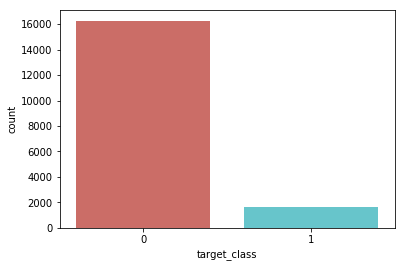

In [4]:
sb.countplot(x='target_class',data=star, palette='hls')

In [5]:
star.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [6]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


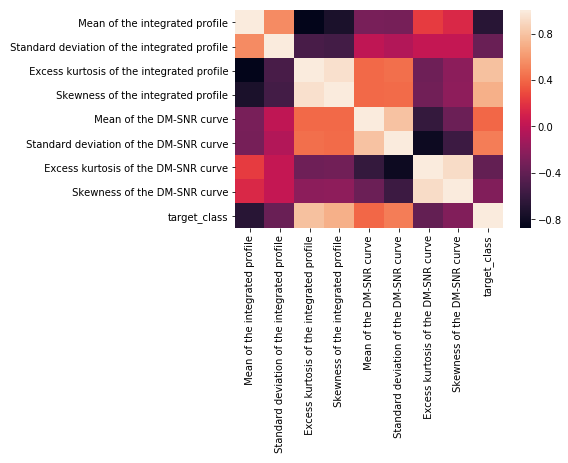

In [7]:
# # Validando independencia entre as variáveis

sb.heatmap(star.corr()) 

In [0]:
#Separar o conjunto em variavel resposta e variaveis de treinamento

X = star.iloc[:,[0,1,2,3,4,5,6,7]].values
y = star.iloc[:,8].values

In [0]:
X = preprocessing.scale(X)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [0]:
#classificador = SVC(gamma=2, C=100)
#classificador = SVC(kernel="sigmoid", gamma=2, C=100) #83%
#classificador = SVC(kernel="poly", gamma=0.1, C=100) # 
classificador = SVC(kernel="linear", C=100) #problema linearmente separável - melhor resultado - nem precisa de SVM (0.9783985102420857)


classificador.fit(X_train, y_train)
y_pred = classificador.predict(X_test)

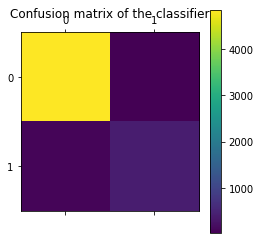

[[4838   29]
 [  87  416]]


In [19]:
cm = confusion_matrix(y_test, y_pred)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()
print(cm)

In [18]:
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4867
           1       0.93      0.83      0.88       503

   micro avg       0.98      0.98      0.98      5370
   macro avg       0.96      0.91      0.93      5370
weighted avg       0.98      0.98      0.98      5370

0.9783985102420857
